In [48]:
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from shutil import copyfile
sns.set(font_scale=2)

%config InlineBackend.figure_format = 'retina'


In [49]:
def create_folder(path):
    if not os.path.exists(path):
        os.makedirs(path)
        

In [50]:
input_dataset_path = 'datasets/tsinghua_resized/'
output_dataset_path = 'datasets/tsinghua_split/'

path_list = os.listdir(input_dataset_path)
image_per_class = list()
classes = list()

for clase in path_list:
    class_path = input_dataset_path + clase
    #print(class_path)
    #print(len(glob(class_path + "/*.png")))
    image_per_class.append(len(glob(class_path + "/*.png")))
    classes.append(clase)
    
    # Create folders
    for split in ['train/','test/']:
        create_folder(output_dataset_path + split + clase)
    
    # Move to test 20% if image_per_class > 10
    for n, images in enumerate(glob(class_path + "/*.png")):
        if image_per_class[-1] < 10 or n > image_per_class[-1]*0.2:
            copyfile(images, images.replace('tsinghua_resized/','tsinghua_split/train/'))
        else:
            copyfile(images, images.replace('tsinghua_resized/','tsinghua_split/test/'))



        


In [51]:
print(image_per_class)

[2, 89, 4, 3, 20, 367, 143, 352, 4, 169, 99, 3, 2, 8, 1, 9, 64, 1, 13, 1310, 16, 383, 122, 714, 1, 2, 3, 32, 5, 317, 1, 11, 1, 32, 1462, 20, 14, 2, 40, 131, 7, 4, 2, 11, 42, 29, 5, 60, 25, 17, 52, 167, 152, 2, 74, 13, 1, 2, 237, 7, 6, 6, 36, 48, 15, 544, 1, 131, 3, 14, 13, 1, 219, 27, 114, 20, 16, 16, 1, 47, 4, 9, 9, 54, 1, 1, 12, 582, 7, 2, 96, 797, 3, 2, 1, 61, 3, 148, 1, 2819, 152, 92, 13, 4, 75, 107, 4, 70, 828, 168, 2, 85, 35, 1, 198, 37, 49, 6, 42, 21, 393, 132, 18, 5, 103, 3, 1, 176, 257, 1, 2, 261, 49, 3, 30, 355, 11, 6, 693, 11, 68, 8, 2, 8, 9, 18, 12, 430, 3, 1521, 286, 8, 8, 21, 1999, 7, 1, 15, 1013, 89, 1, 2, 11, 2, 1, 1, 7, 42, 1, 15, 128, 779, 7, 61, 94]


In [39]:
print(len(glob(class_path + "/*.png")))
print(len(image_per_class))
numpy_y = np.asarray(image_per_class)
print(np.median(numpy_y))

94
176
15.0


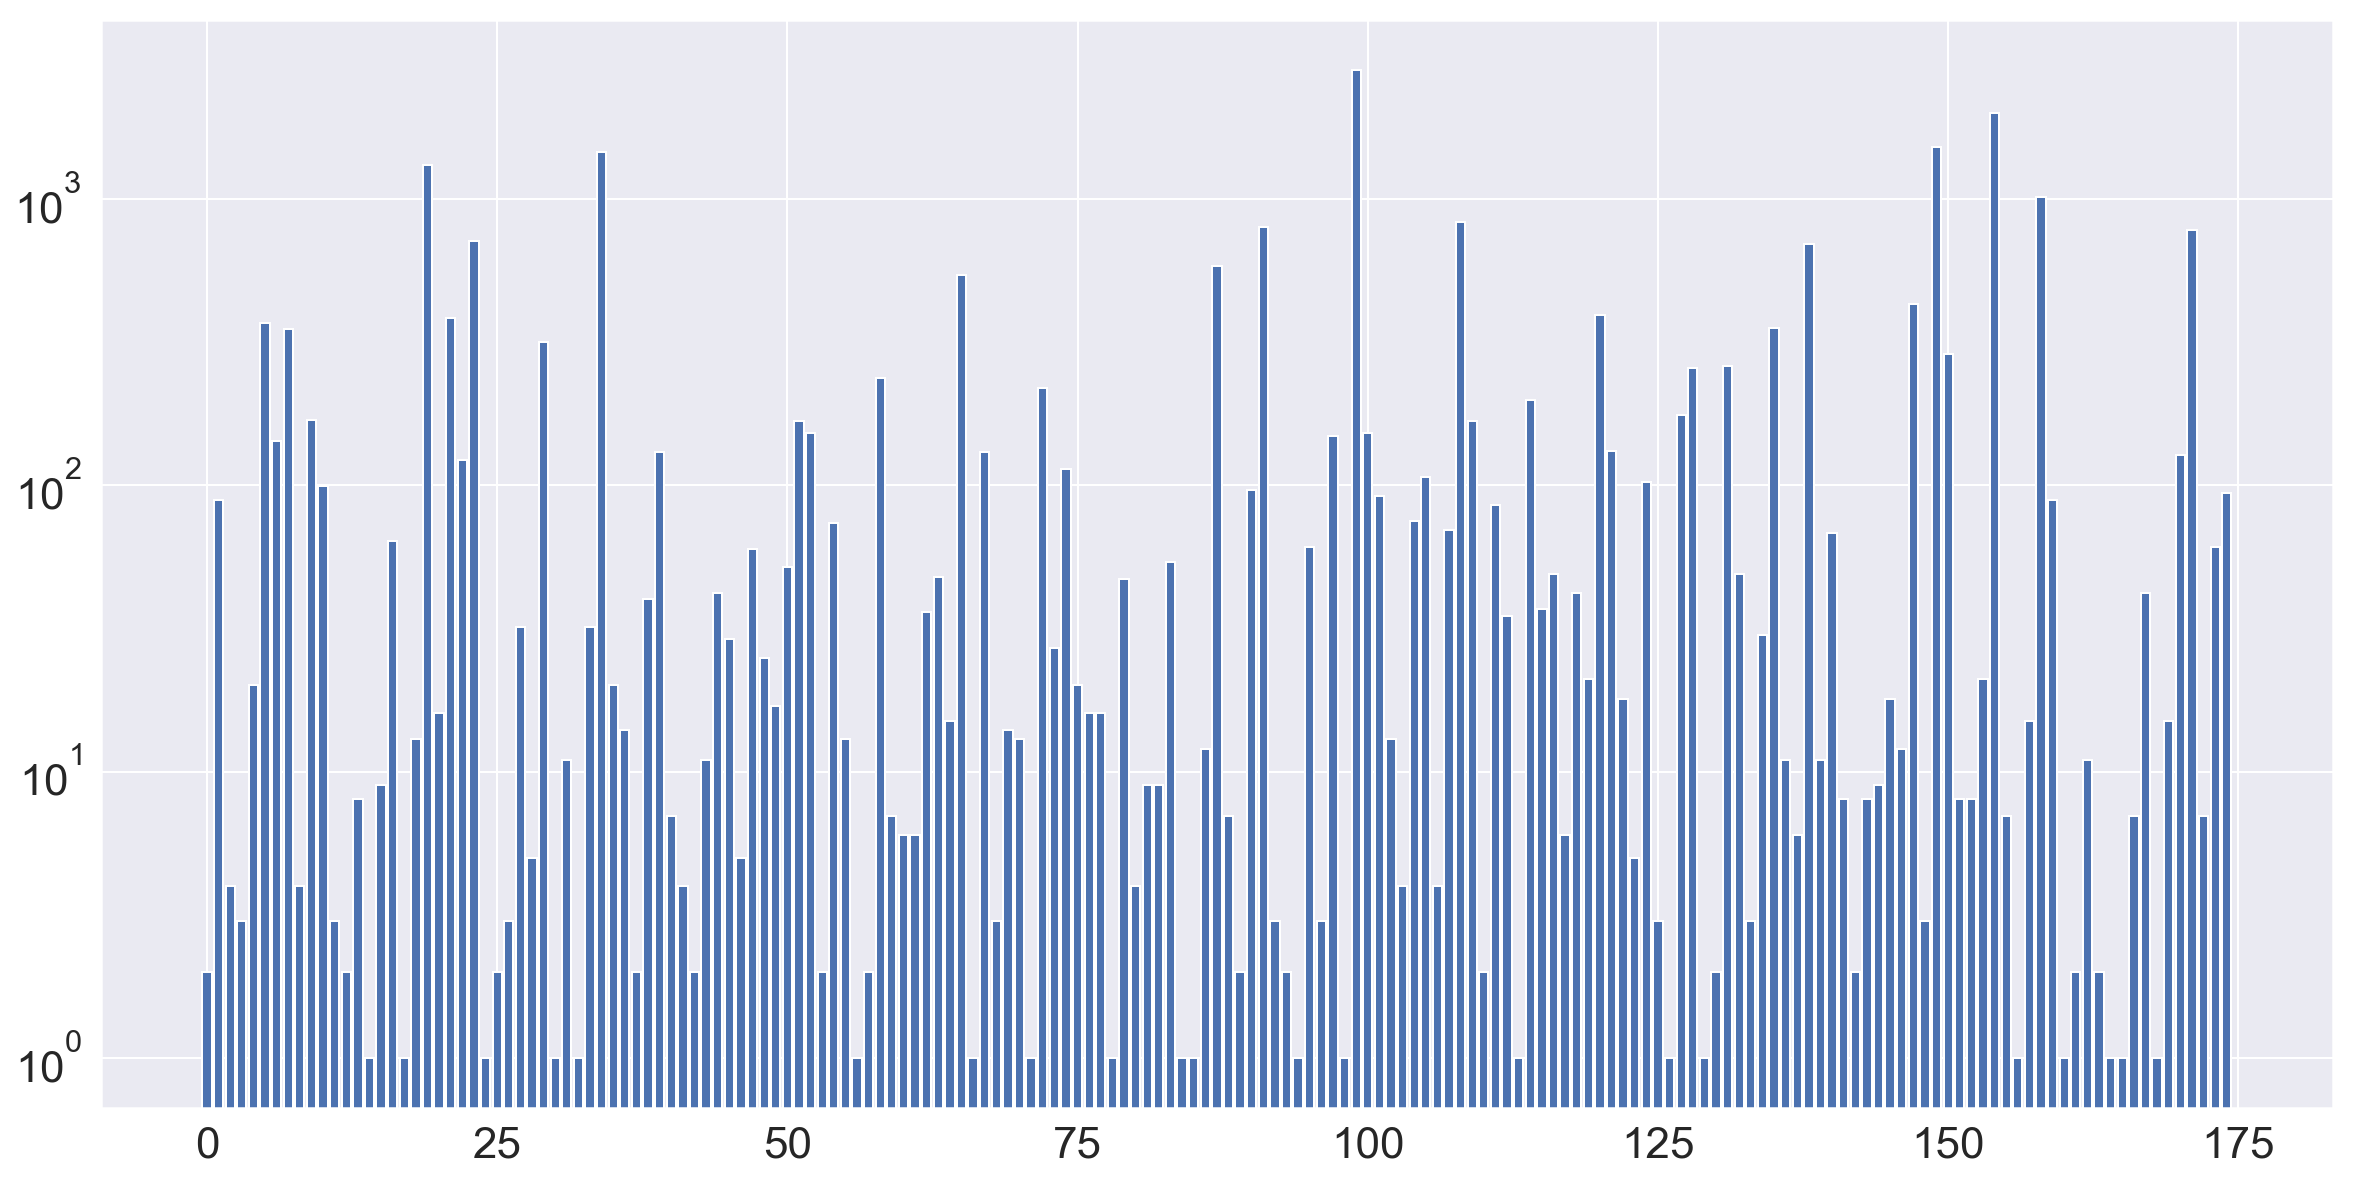

In [18]:
x = np.arange(175)
y = image_per_class

fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(x, y)
ax.set_yscale('log')

plt.show()